
# Dow Jones index Forecasting using Artificial Intelligence 

In my previous posts:

1.See https://github.com/kyramichel/Math_Finance/blob/master/PCA%20app.ipynb

I looked at the composition of the Dow Jones Industrial Average (^DJI - a stock market index that measures the stock performance of the top 30 largest companies listed on US stock exchanges -

2.See https://github.com/kyramichel/Math_Finance/blob/master/Financial_Time_Series_Forecasting_with_auto_ARIMA.ipynb

I built an Dow Jones index price Forecasting ARIMA model using auto ARIMA

In this post, I will use AI Deep Learning to build a LSTM (Long Short-Term Memory) network model to predict Dow index.

LSTM (Long Short-Term Memory) is a Recurrent Neural Network that is best suited for predicting long sequence of data.

In my next post, I will post a number of LSTMs models for various sequence and time series prediction problems, including demand forecasting, text prediction (NLP), etc.

In [ ]:
#imports

import math
import pandas as pd
import numpy as np

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from pandas_datareader import data as pdr
import pandas_datareader.data as web

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Dow Jones index since Jan 1,2020 (COVID19 started) 

dow = pdr.get_data_yahoo('^DJI', '2020-01-01')
dow['Adj Close']

Date
2020-01-02    28868.800781
2020-01-03    28634.880859
2020-01-06    28703.380859
2020-01-07    28583.679688
2020-01-08    28745.089844
                  ...     
2022-08-01    32798.398438
2022-08-02    32396.169922
2022-08-03    32812.500000
2022-08-04    32726.820312
2022-08-05    32803.468750
Name: Adj Close, Length: 654, dtype: float64

<AxesSubplot:xlabel='Date'>

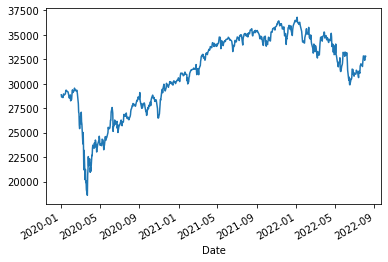

In [ ]:
dow['Adj Close'].plot()

In [ ]:
#split the data into training and testing

close_data = dow['Adj Close'].values
close_data = close_data.reshape((-1,1))


split = int(0.80*len(close_data))
close_train = close_data[:split]
close_test = close_data[split:]

date_train = dow.index[:split]
date_test = dow.index[split:]

print(len(close_train))
print(len(close_test))

523
131



Note: To build an LSTM model, stationarity is not a pre-requisites.

However, data preparation is needed for training a LSTM model.


LSTM uses the past sequence of Dow index price values to predict Dow index price for the next day. 

Training a neural network of any ML model requires that data is in (X,y) format. Therefore, I need to convert the data into (X,y) format. For this, I will use the Keras module: TimeseriesGenerator

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
look_back = 10 # look_back is the number of previous time steps to use to predict the value at the next time period

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(40,activation='relu', input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
26/26 [==============================] - 4s 17ms/step - loss: 210404720.0000
Epoch 2/25
26/26 [==============================] - 0s 16ms/step - loss: 2818871.5000
Epoch 3/25
26/26 [==============================] - 0s 17ms/step - loss: 927264.4375
Epoch 4/25
26/26 [==============================] - 1s 37ms/step - loss: 891496.0625
Epoch 5/25
26/26 [==============================] - 1s 20ms/step - loss: 888881.5625
Epoch 6/25
26/26 [==============================] - 1s 28ms/step - loss: 800385.9375
Epoch 7/25
26/26 [==============================] - 1s 25ms/step - loss: 900788.0000
Epoch 8/25
26/26 [==============================] - 0s 16ms/step - loss: 901316.1250
Epoch 9/25
26/26 [==============================] - 0s 17ms/step - loss: 895061.0000
Epoch 10/25
26/26 [==============================] - 0s 15ms/step - loss: 898280.1250
Epoch 11/25
26/26 [==============================] - 0s 17ms/step - loss: 877393.5625
Epoch 12/25
26/26 [==============================] - 1s 18m

**Prediction**

After training the LTSM model, check the model performance on test data, comparing the actuals vs predicted

In [1]:
import plotly.graph_objs as go

In [ ]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Predicted'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Actuals'
)
layout = go.Layout(
    title = "Dow Jones index",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

From the grapf above, you can see that the LSTM model did a good job at fitting both the training and the test data.

In general, tunning the parameters is needed. 

If the LTSM model is not performing well, try tuning the parameters:  LSTM units, look_back, batch size and num_epochs. Also, this is Vanilla LSTM, so one could enhance the architecture by stacking more LSTM layers.

NOTE: This example show clearly the basic structure of LSTM networks for Time Series Forecasting problems.